# Projet Bio-informatique : Analyse leaf epithelium


All the import

In [15]:
#To reload all the importation

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
#segmentation
import napari
import pandas as pd
import numpy as np
import tifffile
import skimage
from skimage import data
from skimage import measure
from skimage.morphology import disk
from skimage.filters import median
from skimage import morphology
import skimage.filters as filters


#from src.nomdufichier import nomdelafonction
from src.segmentation_group1 import segmentation_group1
from src.segmentation_group2 import segmentation_group2
from src.segmentation_group3 import segmentation_group3
from src.segmentation_group4 import segmentation_group4
from src.segmentation_group5 import segmentation_group5
from src.segmentation_group6 import segmentation_group6

from src.centroid import centroid
from src.lobeyness_per_species import lobeyness_per_species

from src.inverse_label import inverse_label
from src.total_junctions import total_junctions
from src.non_triangular_junction import non_triangular_junction

#loop : read all image (example: .tif)
import glob

#expansion question
from skimage.morphology import convex_hull_image
from skimage.measure import regionprops_table
from skimage.util import map_array
import seaborn as sns #télécharger seaborn
import matplotlib.pyplot as plt

#how cells connected ?
import skimage.data
import skimage.filters
from napari.types import LabelsData
from skimage.filters import threshold_otsu 
from skimage.morphology import skeletonize
from skimage.morphology import square, cube 
import skimage.filters.rank as rank
import sklearn
from sklearn.neighbors import NearestNeighbors
from skimage import color
from tifffile import imread


# All user choice

In [25]:
#PATHS

data_path = "Data/"
database_cell_path = data_path + "FDV_cell_database/"
database_cell_group1 = database_cell_path + "Gr1/"
database_cell_group2 = database_cell_path + "Gr2/"
database_cell_group3 = database_cell_path + "Gr3/"
database_cell_group4 = database_cell_path + "Gr4/"
database_cell_group5 = database_cell_path + "Gr5/"
database_cell_group6 = database_cell_path + "Gr6/"

database_leaf_path = data_folder_path + "FDV_leaf_database/"
results = "results/"
mask_result_folder = results + "mask_result_folder/"

    # 1.How many cells?
results_how_many_cells = results + "results_how_many_cells"
centroids_path = results_how_many_cells + "/centroids"

    #2.How can we infer the cell expansion directions ?
    
results_infer_cell_expansions = results + "results_infer_cell_expansions/"

label_group_species = mask_result_folder + "label_group_species/"

#labels grouped in function of species
Aconitum_carmichaelii_var_arendsi = label_group_species + "Aconitum_carmichaelii_var_arendsi"
Ceratostigma_plumbaginoides = label_group_species + "Ceratostigma_plumbaginoides"
Danae_racemosa = label_group_species + "Danae_racemosa"
Galium_odoratum = label_group_species + "Galium_odoratum/"
Hemerocallis_fulva = label_group_species + "Hemerocallis_fulva"
Jasminum_fruticans = label_group_species + "Jasminum_fruticans"
Paeonia_tenuifolia = label_group_species + "Paeonia_tenuifolia"
Persicaria_affinis = label_group_species + "Persicaria_affinis"
Persicaria_polystachya = label_group_species + "Persicaria_polystachya"
Rohdea_japonica = label_group_species + "Rohdea_japonica"
Rosa_x_damascena_Versicolor = label_group_species + "Rosa_x_damascena_Versicolor"
Succisella_inflexa = label_group_species + "Succisella_inflexa"

    #3. How cells connected ? 
results_how_cells_connect = results + "results_how_cells_connect"
j_centroids_path = results_how_cells_connect + "/j_centroids" 

# Use case

## Segmentation

### Group 1  (NORMAL + TROU FONCE(4-01-700x-2-05.tif ET 5-20)


In [18]:
#Loop to read all images of group 1 
for fnames in glob.glob(database_cell_group1 + "*.tif"):
    
    #segmentation fonction
    label_img = segmentation_group1(fnames)
    
    #Save segmented image in a folder (mask_result_folder)
    name_folder = fnames.split("/")
    tifffile.imwrite(mask_result_folder + "/"+ name_folder[-1], label_img)

Same process for each group but with different segmentation (threshold...)

### Group 2

In [3]:
#Loop to read all images of group 2 
for fnames in glob.glob(database_cell_group2 + "*.tif"):
    label_img = segmentation_group2(fnames)
    name_folder = fnames.split("/")
    tifffile.imwrite(mask_result_folder + "/"+ name_folder[-1], label_img)

### Group 3

In [ ]:
#Loop to read all images of group 3 
for fnames in glob.glob(database_cell_group3 + "*.tif"):
    label_img = segmentation_group3(fnames)
    name_folder = fnames.split("/")
    tifffile.imwrite(mask_result_folder + "/"+ name_folder[-1], label_img)

### Group 4

In [ ]:
#Loop to read all images of group 4 
for fnames in glob.glob(database_cell_group4 + "*.tif"):
    label_img = segmentation_group4(fnames)
    name_folder = fnames.split("/")
    tifffile.imwrite(mask_result_folder + "/"+ name_folder[-1], label_img)

### Group 5 (NORMAL + STOMATE )

In [ ]:
#Loop to read all images of group 5 
for fnames in glob.glob(database_cell_group5 + "*.tif"):
    label_img = segmentation_group5(fnames)
    name_folder = fnames.split("/")
    tifffile.imwrite(mask_result_folder + "/"+ name_folder[-1], label_img)

### Group 6 ( PUZZLE (et parfois d'autre truc) "8-06-700x-2-02.tif" ET "4-17-2" ET "6-21-2" ET "4-15")

In [ ]:
#Loop to read all images of group 6 
for fnames in glob.glob(database_cell_group6 + "*.tif"):
    label_img = segmentation_group6(fnames)
    name_folder = fnames.split("/")
    tifffile.imwrite(mask_result_folder + "/"+ name_folder[-1], label_img)

## QUESTION 1. How many cells ?

#### 1. Csv table with 3 columns : image name ; number of cell ; csv file name

In [19]:
image_name_list = []
nb_cells_list = []
csv_list = []

for image in glob.glob(mask_result_folder +"*.tif"):
    img = tifffile.imread(image)
    name_folder_table = image.split('/')[-1]

    #Count number of cells
    nb_cells = len(np.unique(img))
    
    #List with file name and its number of cells
    image_name_list.append(name_folder_table)
    nb_cells_list.append(nb_cells)
    
    #List with centroid csv
    props = measure.regionprops_table(
        img,
        properties=['label', 'centroid'] 
    )
    
    df_props = pd.DataFrame(props) 
    centroids = df_props[['centroid-0','centroid-1']] #obtaining centroids
    
    csv_list.append("centroids_" + name_folder_table.replace(".tif", ".csv"))

    
    #Creation of a dataframe with a dictionnary
    dictionnary = {'Image_fname' : image_name_list, 'Numbers_of_cells' : nb_cells_list, 'csv_file_name' : csv_list}
    table = pd.DataFrame(dictionnary)

#convert the dataframe into csv and save it in a folder
table.to_csv(results_how_many_cells + "/result_nb_cells_centroids.csv")

#### 2. One csv file per image named cells_centroid-image_name.csv that contains a list of centroids of each cell per image. 


In [20]:
#table with centroid 0 et centroid 1 for each labeled cell image 

for image in glob.glob(mask_result_folder +"*.tif"):
    img = tifffile.imread(image)
    centroid(img)
    name_folder = image.split("/")[-1]
    df_props.to_csv((centroids_path + "/" + "centroids_" + name_folder).replace(".tif", ".csv"))


## Question 2. How can we infer the cell expansion directions?


In [12]:
#calculate the lobeyness of each labeled image of each species

In [21]:
list_species = []

for dname in glob.glob(label_group_species + "*"):
    species_name = dname.split('/')[-1]
    specie = lobeyness_per_species(dname + "/", species_name) #measure lobeyness (function) of each labels per species
    list_species += [specie]

df_species = pd.concat(list_species)
df_species

,label,area,perimeter,convex_hull_perimeter,lobeyness,species
0,1,2915,246.302561,245.338095,1.003931,Aconitum_carmichaelii_var_arendsi
1,2,19670,760.666089,645.948268,1.177596,Aconitum_carmichaelii_var_arendsi
2,3,36512,1610.219480,952.915872,1.689781,Aconitum_carmichaelii_var_arendsi
3,4,3477,283.480231,269.279221,1.052737,Aconitum_carmichaelii_var_arendsi
4,5,12480,487.303607,471.788889,1.032885,Aconitum_carmichaelii_var_arendsi
...,...,...,...,...,...,...
1368,171,2547,319.770599,256.308658,1.247600,Danae_racemosa
1369,172,1912,183.396970,179.982756,1.018970,Danae_racemosa
1370,173,3868,377.195959,377.195959,1.000000,Danae_racemosa
1371,174,5183,898.793939,879.740115,1.021658,Danae_racemosa


In [22]:
#to zoom
%matplotlib notebook

<IPython.core.display.Javascript object>


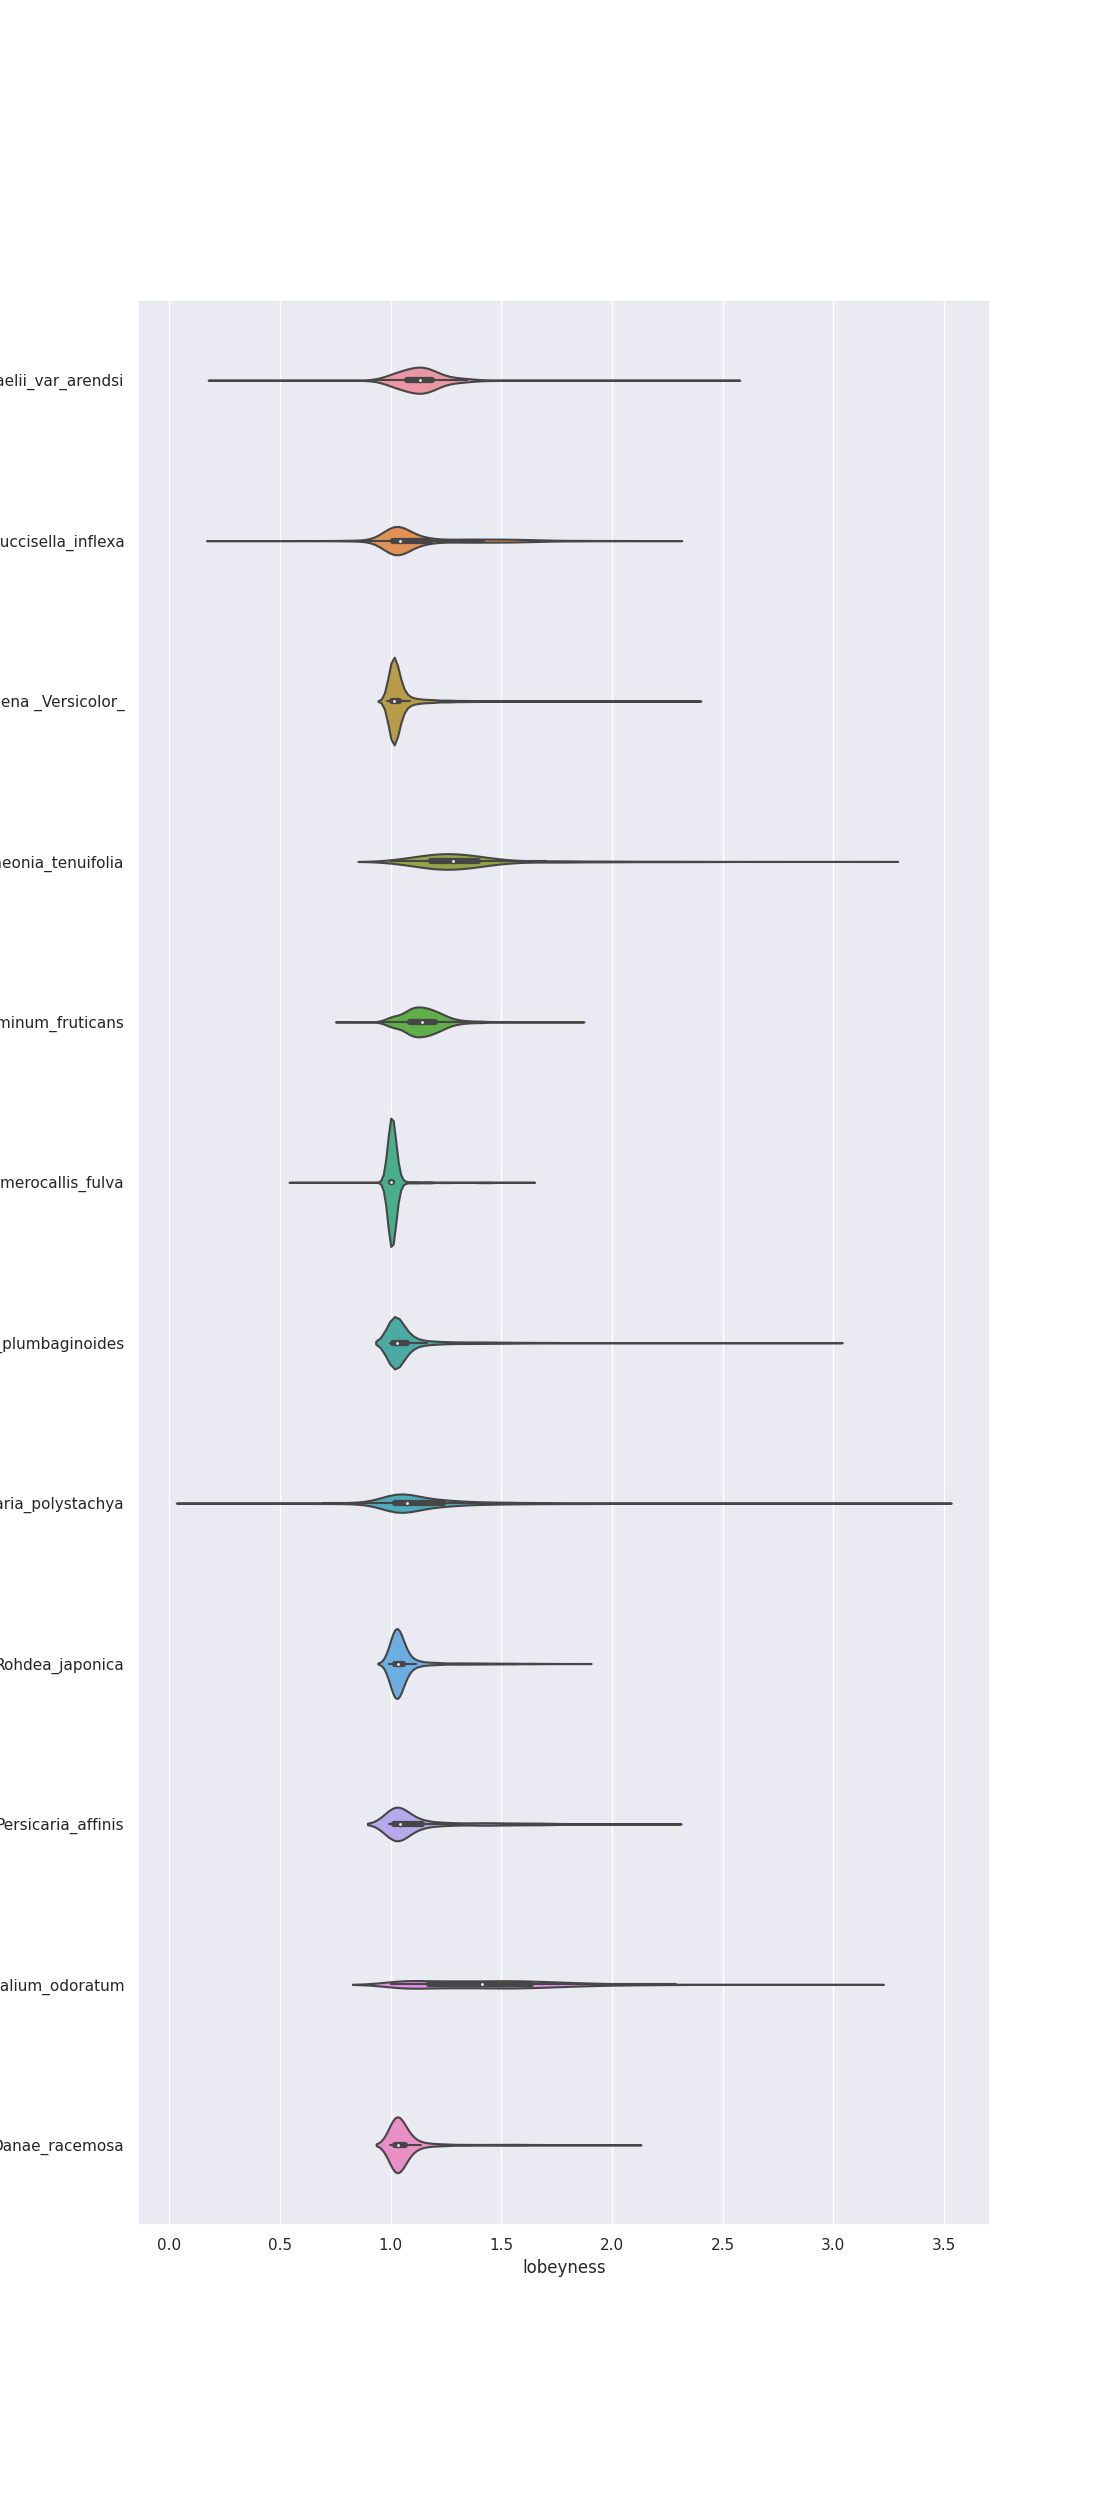

<AxesSubplot: xlabel='lobeyness', ylabel='species'>

In [34]:
#Create the violin plot

sns.set(rc={'figure.figsize':(11,25)})

plt.figure()
violin_plot = sns.violinplot(df_species, x="lobeyness", y="species")

#print the violin_plot of lobeyness per species
violin_plot


In [35]:
#dezoom
%matplotlib inline

<AxesSubplot: xlabel='area', ylabel='lobeyness'>

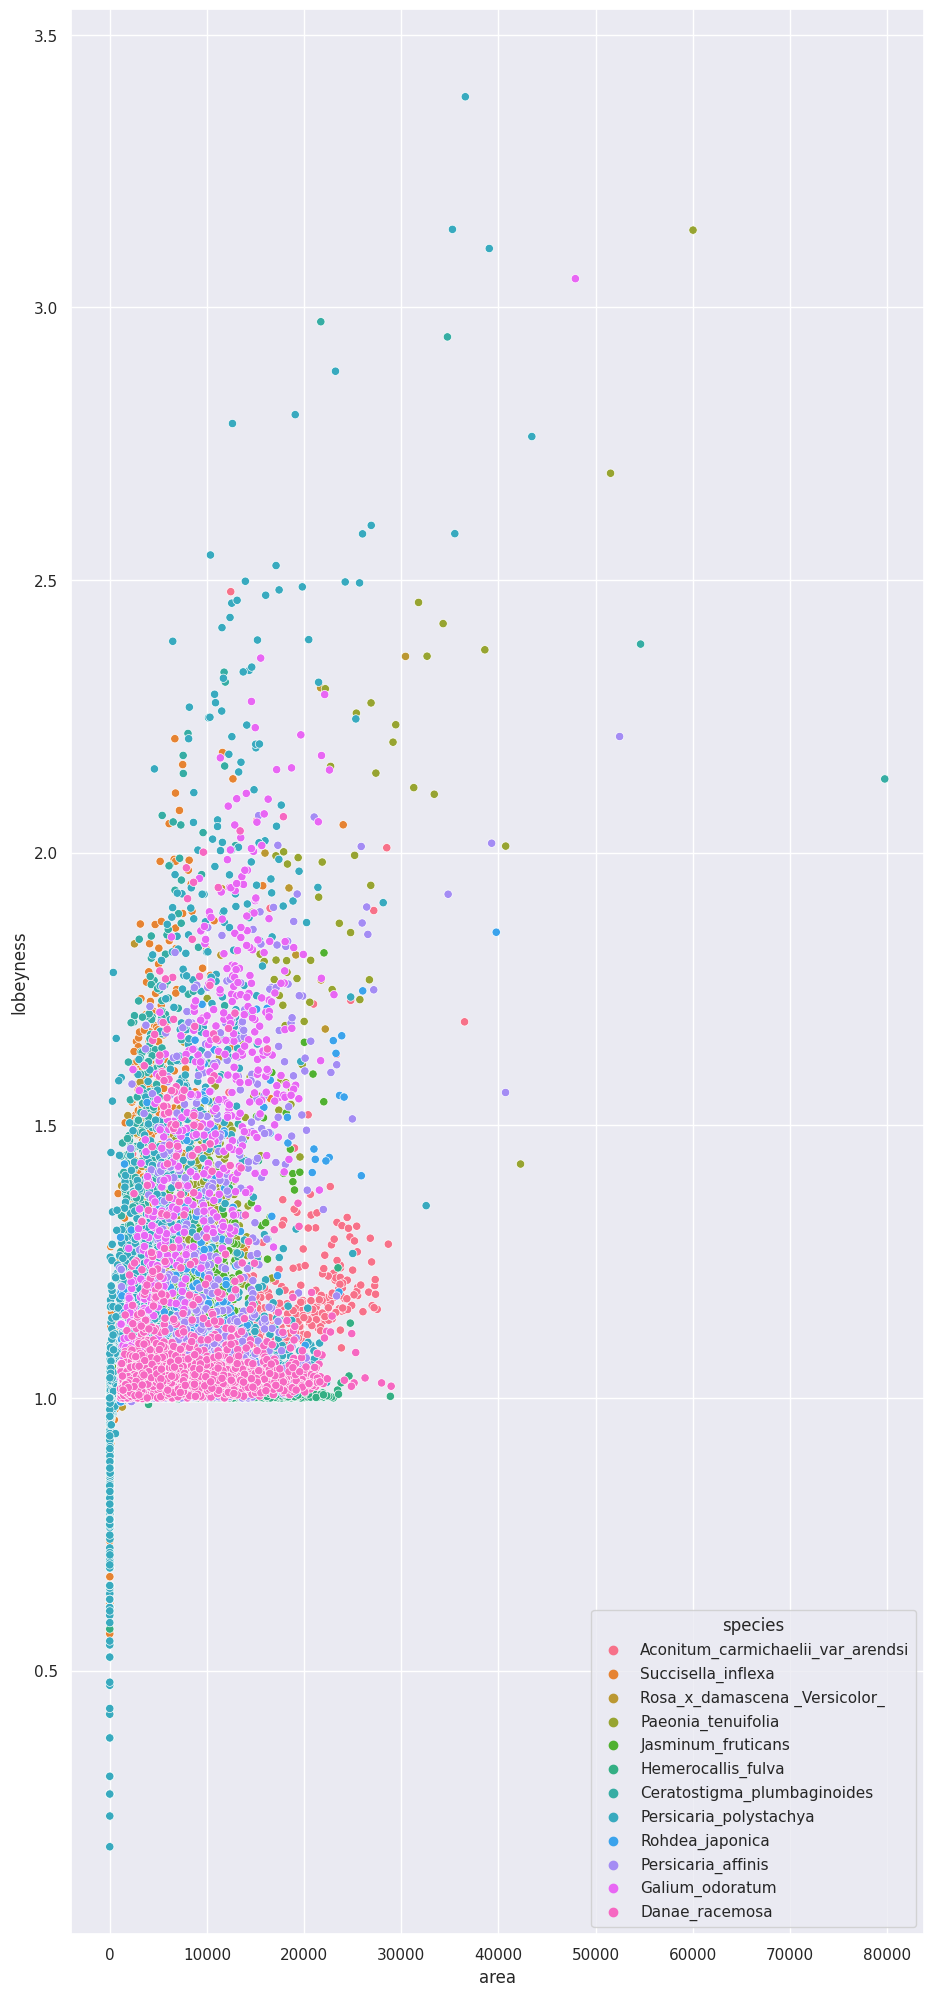

In [36]:
#Create the scatterplot

plt.figure()

scatter_plot = sns.scatterplot(data=df_species, x="area", y="lobeyness", hue="species")

#print the scatter plot
scatter_plot

#### parametric map

In [37]:
#We try here for only one label to compare are precedent results with parametric to see if it's consistent
#if you want to try with other label replace the label_path

label_path = mask_result_folder + "3-15-700x-1-02.tif"
image = tifffile.imread(label_path)


lobeyness = map_array(
    image,
    np.array(df_species['label']), 
    np.array(df_species['lobeyness'])
    )
viewer = napari.Viewer()
viewer.add_image(lobeyness, colormap = 'turbo')

#paratremic map is not working, we observed not well-colored cell image

<Image layer 'lobeyness' at 0x7f4e7e037fd0>

## How are cells connected ?

### OBJECTIFS

Csv table with 4 columns : image name, number non triangular junctions, total nb of junctions, csv file name

One csv file per image named non triangular junctions.csv that contains a list of centroids of each occurrence per image.You should be able to open this file with a drag and drop in napari to create a point layer.


In [48]:
image_ids_list = []
nb_total_list = []
nb_non_triangular_junction_list = []
csv_list = []

for image in glob.glob(mask_result_folder +"*.tif"):
    img = tifffile.imread(image)
    
    # Fill list image name
    image_name = image.split('/')[-1]
    image_ids_list.append(image_name)
    
    # Get segmentation of the contour
    mask_inversed = inverse_label(img)
    
    # Get the nb of junction and their coordinates
    df_junction, total_nb_junctions = total_junctions(mask_inversed)

    # Fill list nb total of junctions
    nb_total_list.append(total_nb_junctions)
    name_folder= image.split('/')
    
    # Find nnt junctions
    df_nnt_junction = non_triangular_junction(df_junction)
    #print("in loading") (if you want to see where the computer is at)
    
    # Fill list nb of nnt junctions
    nb_non_triangular_junction = len(df_nnt_junction["label"])
    nb_non_triangular_junction_list.append(nb_non_triangular_junction)
    

    df_nnt_junction = df_nnt_junction.drop(columns=["label"])
    df_nnt_junction.rename(columns={"centroid-0":"axis-0"}, inplace=True)
    df_nnt_junction.rename(columns={"centroid-1" : "axis-1"}, inplace=True)
    non_triangular_junctions= df_nnt_junction

    
    # Fill list of csv file name
    centroids_csv_data = non_triangular_junctions.to_csv(j_centroids_path+ '/' + "non_triangular_junctions_" + name_folder[-1]+ '.csv', index = True)
    csv_list.append("non_triangular_junctions_" + name_folder[-1].replace(".tif", ".csv"))
    #print(csv_list)
    
    # Create a dico
    dico = {'Image name' : image_ids_list, 'Number non triangular junctions' : nb_non_triangular_junction_list, "Total number of junctions" : nb_total_list, "csv file name" : csv_list}
    
    # Create a dataframe
    df = pd.DataFrame(dico)

#print(df) (if you want to print the dataframe)
df.to_csv(results_how_cells_connect + "/result_examine_junction.csv")

Different way to class cells image per species (different than "How can we infer the cell expansion directions")

In [39]:
#to class image per species

species = {
    "3-07" : "Ceratostigma_minus",
    "3-15" : "Rosa_mollis",
    "4-01": "Persicaria_virginiana",
    "4-02": "Polygonum_chinense",
    "4-15": "Paeonia_tenuifolia",
    "4-17": "Aconitum_carmichaelii",
    "5-20": "Succisella_inflexa",
    "5-22": "Beta_vulgaris",
    "6-19": "Galium_rubioides",
    "6-21": "Galium_odoratum",
    "7-01": "Danae_racemosa",
    "7-15":"Rohdea_japonica",
    "7-23": "Alstromemeria_aurea",
    "7-24": "Hemerocallis_fulva",
    "8-06": "Jasminum_fruticans"}

df["Species"] = df['Image name'].str.split('-').str[:2].str.join("-")
df = df.replace({"Species": species})
df

,Image name,Number non triangular junctions,Total number of junctions,csv file name,Species
0,7-15-400x-1-03.tif,32,444,non_triangular_junctions_7-15-400x-1-03.csv,Rohdea_japonica
1,4-15-400x-2-04.tif,45,599,non_triangular_junctions_4-15-400x-2-04.csv,Paeonia_tenuifolia
2,4-02-700x-1-05.tif,97,736,non_triangular_junctions_4-02-700x-1-05.csv,Polygonum_chinense
3,7-01-700x-t-05.tif,13,339,non_triangular_junctions_7-01-700x-t-05.csv,Danae_racemosa
4,5-20-700x-2-02.tif,129,1157,non_triangular_junctions_5-20-700x-2-02.csv,Succisella_inflexa
...,...,...,...,...,...
79,7-01-700x-t2-04.tif,55,574,non_triangular_junctions_7-01-700x-t2-04.csv,Danae_racemosa
80,7-24-400x-1-04.tif,6,230,non_triangular_junctions_7-24-400x-1-04.csv,Hemerocallis_fulva
81,4-17-400x-2-04.tif,58,529,non_triangular_junctions_4-17-400x-2-04.csv,Aconitum_carmichaelii
82,7-01-700x-t2-03.tif,33,575,non_triangular_junctions_7-01-700x-t2-03.csv,Danae_racemosa


In [40]:
#Define variables used in the following bar plot

x = df['Species']
y = (df["Number non triangular junctions"])/(df["Total number of junctions"])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Rohdea_japonica'),
  Text(1, 0, 'Paeonia_tenuifolia'),
  Text(2, 0, 'Polygonum_chinense'),
  Text(3, 0, 'Danae_racemosa'),
  Text(4, 0, 'Succisella_inflexa'),
  Text(5, 0, 'Persicaria_virginiana'),
  Text(6, 0, 'Galium_odoratum'),
  Text(7, 0, 'Aconitum_carmichaelii'),
  Text(8, 0, 'Hemerocallis_fulva'),
  Text(9, 0, 'Jasminum_fruticans'),
  Text(10, 0, 'Ceratostigma_minus'),
  Text(11, 0, 'Rosa_mollis')])

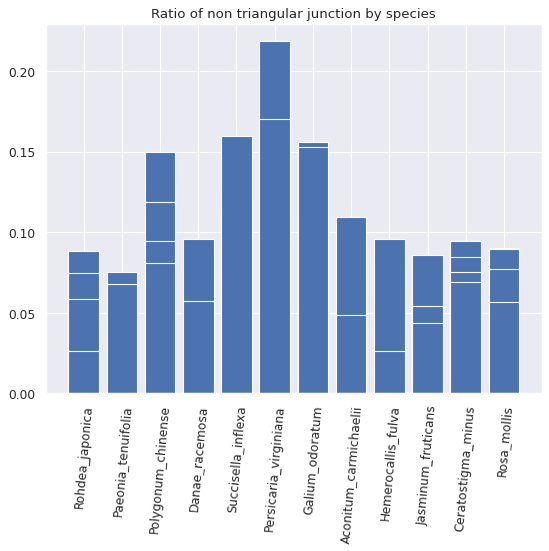

In [47]:
#bar plot 

plt.figure(figsize=(8, 6), dpi=80)

plt.bar(x,y)
plt.title("Ratio of non triangular junction by species")
plt.xticks(rotation = 85)